### Simple Pendulum

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
g = 9.81      # gravitational acceleration (m/s^2)
m = 0.5       # mass of pendulum (kg)
l = 0.7       # length of pendulum (m)
b = 0.1       # Damping coefficient (Ns/m)
dt = 0.01     # time step for integration (s)
T = 10        # total simulation time (s)

In [3]:
# Initial conditions
theta_0 = np.pi / 4  # initial angle (45 degrees)
omega_0 = 0.0        # initial angular velocity

In [4]:
# Initialize arrays to store the results
time = np.arange(0, T+dt, dt)
theta = np.zeros(len(time))
omega = np.zeros(len(time))

In [5]:
# Set initial values
theta[0] = theta_0
omega[0] = omega_0


In [6]:
# Numerical integration using Euler's method
def Euler(alpha, theta, omega, dt):
    omega = omega + alpha * dt
    theta = theta + omega * dt
    return theta, omega

In [7]:
for i in range(1, len(time)):
    # Compute angular acceleration
    alpha = -(b / (m*l**2)) * omega[i - 1] - (g / l) * np.sin(theta[i - 1]) 
    
    # Update angular velocity and angle
    theta[i], omega[i] = Euler(alpha, theta[i-1], omega[i-1], dt)

<IPython.core.display.Javascript object>


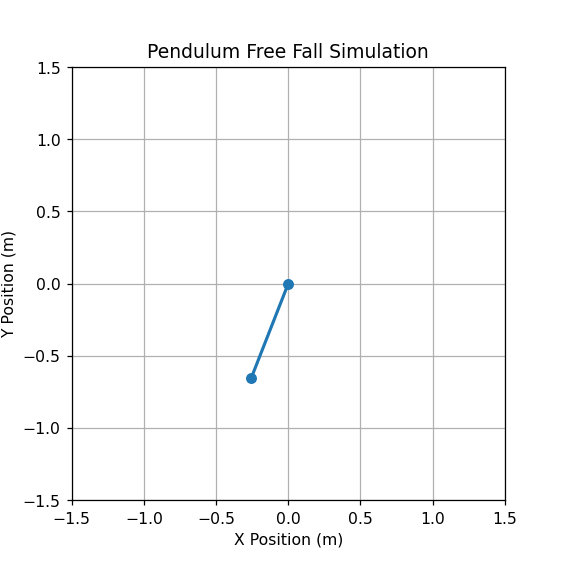

In [8]:
# Visualization
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)

def init():
    line.set_data([0, l * np.sin(theta[0])], [0, -l * np.cos(theta[0])])
    return line,

def update(frame):
    x = l * np.sin(theta[frame])
    y = -l * np.cos(theta[frame])
    line.set_data([0, x], [0, y])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True, interval=dt*1000)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Pendulum Free Fall Simulation")
plt.show()

